<a href="https://colab.research.google.com/github/ThomasMoming/Computer-Vision-Project/blob/Vis/ComputerVisionProject_LicensePlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
pip install notebook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


In [ ]:
!jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --no-browser


|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/ipyparallel.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/panel-client-jupyter.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.jupyter/jupyter_notebook_config.json

  _   _          _      _
 | | | |_ __  __| |__ _| |_ ___
 | |_| | '_ \/ _` / _` |  _/ -_)
  \___/| .__/\__,_\__,_|\__\___|
       |_|
                       
Read the migration plan to Notebook 7 to learn about the new features and the actions to take if you 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [ ]:
test_dir = '/content/drive/MyDrive/License_Plate/Test'
train_dir = '/content/drive/MyDrive/License_Plate/Train'

# 运行一次，创建目录结构
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/labels', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/images/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/images/val', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/labels/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/labels/val', exist_ok=True)

# 设置标签和图片的路径
label_dir= "/content/drive/MyDrive/License_Plate/Final_data/labels"
image_dir= "/content/drive/MyDrive/License_Plate/Final_data/images"

# 确保所有目标文件夹已创建
os.makedirs(os.path.join(label_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(label_dir, "val"), exist_ok=True)
os.makedirs(os.path.join(image_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(image_dir, "val"), exist_ok=True)


In [ ]:
# 打印训练集和测试集中的文件
print("训练集文件:", os.listdir(train_dir))
print("测试集文件:", os.listdir(test_dir))

训练集文件: ['Cars132.xml', 'Cars140.xml', 'Cars135.xml', 'Cars139.xml', 'Cars133.xml', 'Cars134.xml', 'Cars138.xml', 'Cars137.xml', 'Cars141.xml', 'Cars136.xml', 'Cars131.xml', 'Cars184.xml', 'Cars165.xml', 'Cars156.xml', 'Cars143.xml', 'Cars145.xml', 'Cars158.xml', 'Cars162.xml', 'Cars151.xml', 'Cars176.xml', 'Cars179.xml', 'Cars172.xml', 'Cars180.xml', 'Cars178.xml', 'Cars167.xml', 'Cars183.xml', 'Cars177.xml', 'Cars161.xml', 'Cars175.xml', 'Cars170.xml', 'Cars146.xml', 'Cars187.xml', 'Cars147.xml', 'Cars157.xml', 'Cars181.xml', 'Cars155.xml', 'Cars144.xml', 'Cars154.xml', 'Cars164.xml', 'Cars152.xml', 'Cars171.xml', 'Cars150.xml', 'Cars153.xml', 'Cars173.xml', 'Cars166.xml', 'Cars159.xml', 'Cars185.xml', 'Cars163.xml', 'Cars149.xml', 'Cars186.xml', 'Cars168.xml', 'Cars148.xml', 'Cars169.xml', 'Cars182.xml', 'Cars160.xml', 'Cars174.xml', 'Cars142.xml', 'Cars199.xml', 'Cars193.xml', 'Cars222.xml', 'Cars190.xml', 'Cars221.xml', 'Cars195.xml', 'Cars228.xml', 'Cars197.xml', 'Cars225.xml', 'C

In [ ]:
# 复制训练集的 XML 和 PNG 文件
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        source_path = os.path.join(train_dir, file)
        destination_path = os.path.join(label_dir, "train", file)
        print(f"复制 XML 文件: {source_path} -> {destination_path}")
        shutil.copy(source_path, destination_path)
    if file.endswith(".png"):  # 修改后缀检查为 .png
        source_path = os.path.join(train_dir, file)
        image = Image.open(source_path)
        image = image.convert("RGB")  # 将 PNG 文件转换为 RGB 格式
        new_filename = os.path.splitext(file)[0] + ".jpg"  # 保存为 JPG 格式
        save_path = os.path.join(image_dir, "train", new_filename)
        print(f"复制 PNG 文件并转换为 JPG: {source_path} -> {save_path}")
        image.save(save_path, "JPEG")

# 复制测试集的 XML 和 PNG 文件
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        source_path = os.path.join(test_dir, file)
        destination_path = os.path.join(label_dir, "val", file)
        print(f"复制 XML 文件: {source_path} -> {destination_path}")
        shutil.copy(source_path, destination_path)
    if file.endswith(".png"):  # 修改后缀检查为 .png
        source_path = os.path.join(test_dir, file)
        image = Image.open(source_path)
        image = image.convert("RGB")  # 将 PNG 文件转换为 RGB 格式
        new_filename = os.path.splitext(file)[0] + ".jpg"  # 保存为 JPG 格式
        save_path = os.path.join(image_dir, "val", new_filename)
        print(f"复制 PNG 文件并转换为 JPG: {source_path} -> {save_path}")
        image.save(save_path, "JPEG")

# 查看训练集图像文件夹中是否有文件
train_images = os.listdir(os.path.join(image_dir, "train"))
print("训练集图像文件数量:", len(train_images))
print("训练集图像示例:", train_images[:5])  # 查看前5个文件名

# 查看验证集图像文件夹中是否有文件
val_images = os.listdir(os.path.join(image_dir, "val"))
print("验证集图像文件数量:", len(val_images))
print("验证集图像示例:", val_images[:5])  # 查看前5个文件名




复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars132.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars132.xml
复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars140.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars140.xml
复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars135.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars135.xml
复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars139.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars139.xml
复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars133.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars133.xml
复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars134.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars134.xml
复制 XML 文件: /content/drive/MyDrive/License_Plate/Train/Cars138.xml -> /content/drive/MyDrive/License_Plate/Final_data/labels/train/Cars138.xml
复制 XML

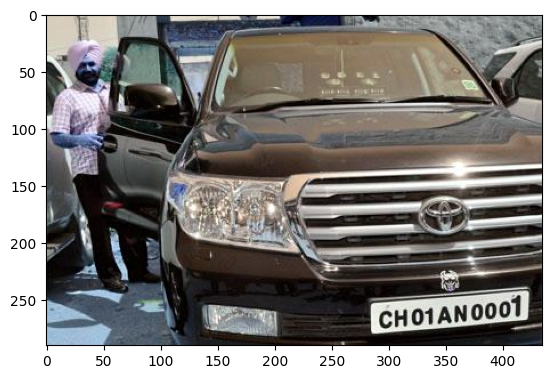

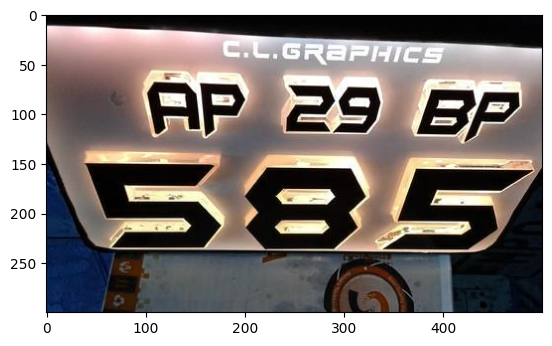

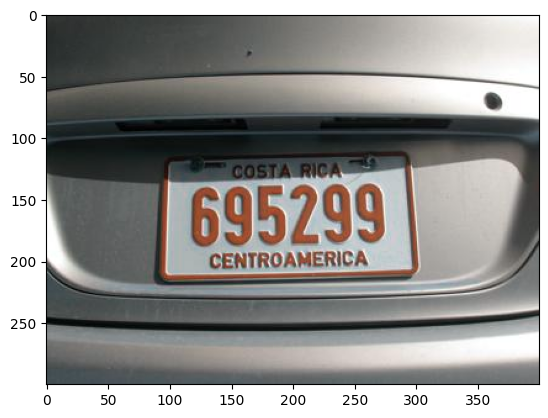

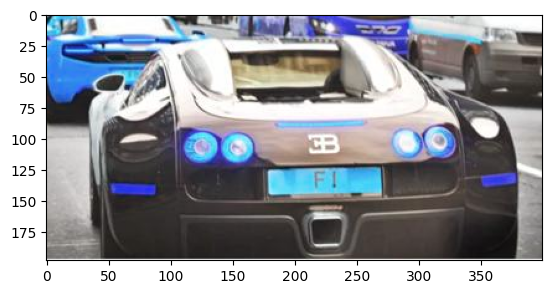

In [ ]:
# 可视化训练数据集的前四张图片
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir, "train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [ ]:
# 定义数据字典用于存储训练和验证集的标签信息
df_train = {'name': [], 'label': [], 'width': [], 'height': [], 'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []}
df_val = {'name': [], 'label': [], 'width': [], 'height': [], 'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []}

# 用于解析 XML 文件，提取标签数据的函数
def parse_annotations(xml_dir, data_dict):
    for idx, anno in enumerate(glob.glob(xml_dir + '/*.xml')):
        tree = ET.parse(anno)
        root = tree.getroot()
        width, height = None, None

        # 遍历 XML 结构并提取信息
        for item in root.iter():
            if item.tag == 'size':
                for attr in list(item):
                    if attr.tag == 'width':
                        width = int(round(float(attr.text)))
                    if attr.tag == 'height':
                        height = int(round(float(attr.text)))
            if item.tag == 'object':
                for attr in list(item):
                    if 'name' in attr.tag:
                        label = attr.text
                        data_dict['label'].append(label)
                        data_dict['width'].append(width)
                        data_dict['height'].append(height)
                        data_dict['name'].append(anno.split('/')[-1][0:-4])
                    if 'bndbox' in attr.tag:
                        for dim in attr:
                            if dim.tag == 'xmin':
                                xmin = int(round(float(dim.text)))
                                data_dict['xmin'].append(xmin)
                            if dim.tag == 'ymin':
                                ymin = int(round(float(dim.text)))
                                data_dict['ymin'].append(ymin)
                            if dim.tag == 'xmax':
                                xmax = int(round(float(dim.text)))
                                data_dict['xmax'].append(xmax)
                            if dim.tag == 'ymax':
                                ymax = int(round(float(dim.text)))
                                data_dict['ymax'].append(ymax)

# 解析训练和验证集的 XML 文件
label_dir = "/content/drive/MyDrive/License_Plate/Final_data/labels"
parse_annotations(label_dir + "/train", df_train)
parse_annotations(label_dir + "/val", df_val)

正在读取图片: /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars194.jpg


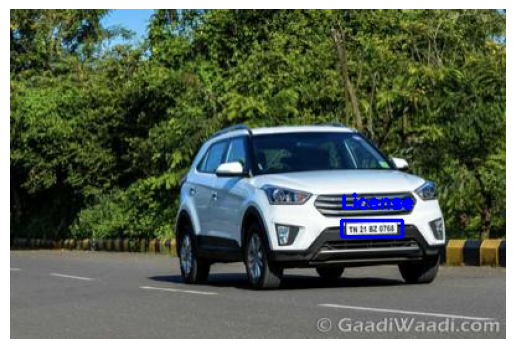

In [ ]:
# 显示训练集中的第1张图片
image_dir = "/content/drive/MyDrive/License_Plate/Final_data/images/train"
idx = 90  # 第1张图片的索引

# 构建图片路径
image_path = f"{image_dir}/{df_train['name'][idx]}.jpg"
print(f"正在读取图片: {image_path}")

# 读取图片
img = cv2.imread(image_path)

if img is None:
    print(f"图片无法读取: {image_path}")
else:
    # 获取边界框坐标和标签
    xmin, ymin, xmax, ymax = df_train['xmin'][idx], df_train['ymin'][idx], df_train['xmax'][idx], df_train['ymax'][idx]
    label = "License"  # 固定显示为 License

    # 绘制边界框
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # 计算文本位置，将 License 标签显示在框的上方
    text_position = (xmin, ymin - 10)  # 将文本放在框的上方
    cv2.putText(img, label, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 将 BGR 转换为 RGB，以便 Matplotlib 正确显示
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 显示图片
    plt.imshow(img_rgb)
    plt.axis('off')  # 隐藏坐标轴
    plt.show()

In [ ]:
import pandas as pd
train_df = pd.DataFrame(df_train)
val_df=pd.DataFrame(df_val)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Cars111,licence,600,338,319,165,478,204
1,Cars125,licence,400,260,280,196,355,257
2,Cars110,licence,400,267,286,133,328,159
3,Cars123,licence,400,300,159,221,237,242
4,Cars14,licence,400,225,94,118,274,163


In [ ]:
index = 0  # 定义一个具体的行索引
filtered_df = train_df[train_df['name'] == train_df['name'][index]]
print(filtered_df)


      name    label  width  height  xmin  ymin  xmax  ymax
0  Cars140  licence    435     290   283   239   424   286


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    139 non-null    object
 1   label   139 non-null    object
 2   width   139 non-null    int64 
 3   height  139 non-null    int64 
 4   xmin    139 non-null    int64 
 5   ymin    139 non-null    int64 
 6   xmax    139 non-null    int64 
 7   ymax    139 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 8.8+ KB


In [ ]:
print(train_df['label'].unique())
print(val_df['label'].unique())

label_map = { 'licence': 0}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

['licence']
['licence']


In [ ]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,Cars140,licence,435,290,283,239,424,286,0
1,Cars132,licence,400,225,23,190,56,198,0
2,Cars132,licence,400,225,378,188,400,200,0
3,Cars135,licence,400,225,260,184,319,211,0
4,Cars138,licence,400,301,153,141,254,185,0


In [ ]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,Cars140,licence,435,290,283,239,424,286,0,0.812644,0.905172,0.324138,0.162069
1,Cars132,licence,400,225,23,190,56,198,0,0.098750,0.862222,0.082500,0.035556
2,Cars132,licence,400,225,378,188,400,200,0,0.972500,0.862222,0.055000,0.053333
3,Cars135,licence,400,225,260,184,319,211,0,0.723750,0.877778,0.147500,0.120000
4,Cars138,licence,400,301,153,141,254,185,0,0.508750,0.541528,0.252500,0.146179


In [ ]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)


before deleting (train data):  (392, 13)
after deleting(train_data):  (392, 13)
before deleting (val data):  (139, 13)
after deleting(val data):  (139, 13)


In [ ]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

filtered_df = train_df[train_df['name'] == train_df["name"][100]]
(filtered_df.head(15))

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
100,Cars214,licence,400,243,188,121,214,134,0,0.5025,0.5246913580246914,0.065,0.053497942386831275


In [ ]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

In [ ]:
# 定义图片和标签的路径
image_dir = "/content/drive/MyDrive/License_Plate/Final_data/images"
label_dir = "/content/drive/MyDrive/License_Plate/Final_data/labels"

# 获取训练集和验证集的图片和标签文件列表
train_images = glob.glob(os.path.join(image_dir, "train", '*.jpg'))
train_labels = glob.glob(os.path.join(label_dir, "train", '*.txt'))
val_images = glob.glob(os.path.join(image_dir, "val", '*.jpg'))
val_labels = glob.glob(os.path.join(label_dir, "val", '*.txt'))

# 打印文件数量以检查是否路径正确
print("训练集图片数量:", len(train_images))
print("训练集标签数量:", len(train_labels))
print("验证集图片数量:", len(val_images))
print("验证集标签数量:", len(val_labels))

训练集图片数量: 362
训练集标签数量: 362
验证集图片数量: 131
验证集标签数量: 131


In [ ]:
# 检查训练集图片和标签的匹配情况
image_files_train = {file.split("/")[-1].split(".")[0] for file in train_images}
label_files_train = {file.split("/")[-1].split(".")[0] for file in train_labels}
missing_labels = image_files_train - label_files_train
missing_images = label_files_train - image_files_train

print("训练集中缺少标签的图片文件:", missing_labels)
print("训练集中缺少图片的标签文件:", missing_images)

# 同样检查验证集
image_files_val = {file.split("/")[-1].split(".")[0] for file in val_images}
label_files_val = {file.split("/")[-1].split(".")[0] for file in val_labels}
missing_labels_val = image_files_val - label_files_val
missing_images_val = label_files_val - image_files_val

print("验证集中缺少标签的图片文件:", missing_labels_val)
print("验证集中缺少图片的标签文件:", missing_images_val)


训练集中缺少标签的图片文件: set()
训练集中缺少图片的标签文件: set()
验证集中缺少标签的图片文件: set()
验证集中缺少图片的标签文件: set()


In [ ]:
# 训练数据集中的多余文件
extra_images_train = image_files_train - label_files_train  # 存在图片文件但没有对应标签的文件
extra_labels_train = label_files_train - image_files_train  # 存在标签文件但没有对应图片的文件

# 输出结果
print(f"Training Extra images (without corresponding labels): {extra_images_train}")
print(f"Training Extra labels (without corresponding images): {extra_labels_train}")

# 验证数据集中的多余文件
extra_images_val = image_files_val - label_files_val  # 存在图片文件但没有对应标签的文件
extra_labels_val = label_files_val - image_files_val  # 存在标签文件但没有对应图片的文件

# 输出结果
print(f"Validation Extra images (without corresponding labels): {extra_images_val}")
print(f"Validation Extra labels (without corresponding images): {extra_labels_val}")


Training Extra images (without corresponding labels): set()
Training Extra labels (without corresponding images): set()
Validation Extra images (without corresponding labels): set()
Validation Extra labels (without corresponding images): set()


In [3]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.3/112.6 GB disk)


In [12]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 266MB/s]


In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
%%writefile config.yaml
path: /content/drive/MyDrive/License_Plate/Final_data
train: /content/drive/MyDrive/License_Plate/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/License_Plate/Final_data/images/val

# Classes
nc: 1  # 将类别数量更改为数据集的类别数量（假设为1个类别）

# Class names
# 更新类别名称
names:
  0: licence


Writing config.yaml


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Nov  6 06:31:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   43C    P8              17W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from ultralytics import YOLO
import itertools

# 定义候选超参数
epochs_options = [5, 10, 20]
patience_options = [3, 5]
batch_options = [8, 16]
lr_options = [0.0005, 0.001]

# 初始化最佳参数和最高的性能
best_config = None
best_map = 0

# 遍历所有参数组合
for epochs, patience, batch, lr in itertools.product(epochs_options, patience_options, batch_options, lr_options):
    print(f"Training with epochs={epochs}, patience={patience}, batch={batch}, lr={lr}")

    # 加载 YOLO 模型
    model = YOLO('yolov8s.pt')  # 使用预训练模型

    # 使用 config.yaml 中的数据进行训练
    model.train(data="config.yaml", epochs=epochs, patience=patience, batch=batch, lr0=lr, imgsz=640)

    # 验证模型，获取 mAP（或其他指标）
    metrics = model.val()
    map50_95 = metrics.box.map  # 获取 map50-95

    # 更新最佳超参数配置
    if map50_95 > best_map:
        best_map = map50_95
        best_config = {
            'epochs': epochs,
            'patience': patience,
            'batch': batch,
            'lr0': lr
        }

    print(f"Completed training with mAP50-95: {map50_95}\n")

print(f"Best config: {best_config} with mAP50-95: {best_map}")


Training with epochs=5, patience=3, batch=8, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=3, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 56.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 346MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.16G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:06<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.18G       1.58      1.677      1.287         14        640: 100%|██████████| 38/38 [00:03<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.11it/s]

                   all        131        139      0.793      0.669      0.713      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       2.1G      1.489      1.288      1.294         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.18it/s]

                   all        131        139      0.857      0.688      0.758      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.18G      1.481      1.102      1.231         14        640: 100%|██████████| 38/38 [00:03<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.06it/s]

                   all        131        139      0.667       0.72      0.646       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.09G      1.426      1.035      1.211         13        640: 100%|██████████| 38/38 [00:03<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.65it/s]

                   all        131        139       0.78      0.767      0.837      0.475



5 epochs completed in 0.009 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.55it/s]


                   all        131        139      0.802      0.758      0.837      0.473
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00,  9.44it/s]


                   all        131        139      0.826      0.727      0.843       0.47
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
Completed training with mAP50-95: 0.4699412650588705

Training with epochs=5, patience=3, batch=8, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=3, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fal

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.37G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:03<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.26it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.24G       1.58      1.677      1.287         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.52it/s]

                   all        131        139      0.793      0.669      0.713      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.14G      1.489      1.288      1.294         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.71it/s]

                   all        131        139      0.857      0.688      0.758      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.14G      1.481      1.102      1.231         14        640: 100%|██████████| 38/38 [00:03<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.13it/s]

                   all        131        139      0.667       0.72      0.646       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.13G      1.426      1.035      1.211         13        640: 100%|██████████| 38/38 [00:03<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.49it/s]

                   all        131        139       0.78      0.767      0.837      0.475



5 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.45it/s]


                   all        131        139      0.802      0.758      0.837      0.473
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train3
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.12it/s]


                   all        131        139      0.826      0.727      0.843       0.47
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train32
Completed training with mAP50-95: 0.4699412650588705

Training with epochs=5, patience=3, batch=16, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.13G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.87G      1.513      1.496      1.255         29        640: 100%|██████████| 19/19 [00:03<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.81it/s]

                   all        131        139       0.54       0.59      0.525      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.89G      1.459      1.235      1.214         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]

                   all        131        139      0.867      0.626       0.73      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.86G      1.371      1.058      1.211         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.47it/s]

                   all        131        139       0.44      0.555      0.348       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.89G      1.358     0.9571       1.18         34        640: 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.73it/s]

                   all        131        139      0.839       0.75      0.847      0.479



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


                   all        131        139      0.839       0.75      0.847      0.479
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train4
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.39it/s]


                   all        131        139       0.85      0.776       0.85      0.481
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train42
Completed training with mAP50-95: 0.48139438011499225

Training with epochs=5, patience=3, batch=16, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.99G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.88G      1.513      1.496      1.255         29        640: 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

                   all        131        139       0.54       0.59      0.525      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.91G      1.459      1.235      1.214         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.57it/s]

                   all        131        139      0.867      0.626       0.73      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.88G      1.371      1.058      1.211         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]

                   all        131        139       0.44      0.555      0.348       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.91G      1.358     0.9571       1.18         34        640: 100%|██████████| 19/19 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.70it/s]

                   all        131        139      0.839       0.75      0.847      0.479



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 22.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


                   all        131        139      0.839       0.75      0.847      0.479
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train5
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.71it/s]


                   all        131        139       0.85      0.776       0.85      0.481
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train52
Completed training with mAP50-95: 0.48139438011499225

Training with epochs=5, patience=5, batch=8, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.33G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:03<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.13G       1.58      1.677      1.287         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.22it/s]

                   all        131        139      0.793      0.669      0.713      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.09G      1.489      1.288      1.294         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.85it/s]

                   all        131        139      0.857      0.688      0.758      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.11G      1.481      1.102      1.231         14        640: 100%|██████████| 38/38 [00:03<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.35it/s]

                   all        131        139      0.667       0.72      0.646       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.12G      1.426      1.035      1.211         13        640: 100%|██████████| 38/38 [00:03<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.86it/s]

                   all        131        139       0.78      0.767      0.837      0.475



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 22.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]


                   all        131        139      0.802      0.758      0.837      0.473
Speed: 0.4ms preprocess, 4.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train6
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.08it/s]


                   all        131        139      0.826      0.727      0.843       0.47
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train62
Completed training with mAP50-95: 0.4699412650588705

Training with epochs=5, patience=5, batch=8, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fa

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.39G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:04<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.58it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.27G       1.58      1.677      1.287         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.53it/s]

                   all        131        139      0.793      0.669      0.713      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.17G      1.489      1.288      1.294         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.85it/s]

                   all        131        139      0.857      0.688      0.758      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.16G      1.481      1.102      1.231         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.05it/s]

                   all        131        139      0.667       0.72      0.646       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.17G      1.426      1.035      1.211         13        640: 100%|██████████| 38/38 [00:03<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.85it/s]

                   all        131        139       0.78      0.767      0.837      0.475



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 22.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]


                   all        131        139      0.802      0.758      0.837      0.473
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train7
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.55it/s]


                   all        131        139      0.826      0.727      0.843       0.47
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train72
Completed training with mAP50-95: 0.4699412650588705

Training with epochs=5, patience=5, batch=16, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.13G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.89G      1.513      1.496      1.255         29        640: 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.39it/s]

                   all        131        139       0.54       0.59      0.525      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.91G      1.459      1.235      1.214         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.55it/s]

                   all        131        139      0.867      0.626       0.73      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.88G      1.371      1.058      1.211         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.21it/s]

                   all        131        139       0.44      0.555      0.348       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.92G      1.358     0.9571       1.18         34        640: 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.94it/s]

                   all        131        139      0.839       0.75      0.847      0.479



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 22.5MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]


                   all        131        139      0.839       0.75      0.847      0.479
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train8
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.66it/s]


                   all        131        139       0.85      0.776       0.85      0.481
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train82
Completed training with mAP50-95: 0.48139438011499225

Training with epochs=5, patience=5, batch=16, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.11G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.91G      1.513      1.496      1.255         29        640: 100%|██████████| 19/19 [00:03<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.47it/s]

                   all        131        139       0.54       0.59      0.525      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.93G      1.459      1.235      1.214         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.90it/s]

                   all        131        139      0.867      0.626       0.73      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       3.9G      1.371      1.058      1.211         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all        131        139       0.44      0.555      0.348       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.93G      1.358     0.9571       1.18         34        640: 100%|██████████| 19/19 [00:03<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.51it/s]

                   all        131        139      0.839       0.75      0.847      0.479



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 22.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]


                   all        131        139      0.839       0.75      0.847      0.479
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train9
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]


                   all        131        139       0.85      0.776       0.85      0.481
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train92
Completed training with mAP50-95: 0.48139438011499225

Training with epochs=10, patience=3, batch=8, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=3, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, ha

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.32G       1.78      6.137      1.469          6        640: 100%|██████████| 38/38 [00:04<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.76it/s]

                   all        131        139      0.661      0.374      0.428      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.2G       1.77      2.213      1.543          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.42it/s]

                   all        131        139      0.745      0.698      0.705      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.18G      1.646      1.637      1.407          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.40it/s]

                   all        131        139      0.124      0.475      0.105     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.16G      1.683      1.343      1.458          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.77it/s]

                   all        131        139       0.56      0.532      0.442      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.18G      1.705      1.404      1.474          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.11it/s]

                   all        131        139      0.778      0.612       0.69      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.17G      1.619       1.26      1.431          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.89it/s]

                   all        131        139      0.911      0.664      0.792      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.17G      1.608      1.225      1.414          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.04it/s]

                   all        131        139      0.863      0.698      0.814      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.17G      1.543      1.108       1.34          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.94it/s]

                   all        131        139      0.814      0.756      0.814      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.18G      1.483      1.038      1.344          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.77it/s]

                   all        131        139      0.868      0.759      0.864      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.17G      1.365     0.9452      1.242          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.75it/s]

                   all        131        139      0.907      0.773      0.883      0.489



10 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 22.5MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]


                   all        131        139      0.903       0.77      0.883       0.49
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train10
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.93it/s]


                   all        131        139      0.907       0.77      0.882       0.49
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train102
Completed training with mAP50-95: 0.4900548269695725

Training with epochs=10, patience=3, batch=8, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=3, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, hal

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.39G       1.78      6.137      1.469          6        640: 100%|██████████| 38/38 [00:04<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.87it/s]

                   all        131        139      0.661      0.374      0.428      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.2G       1.77      2.213      1.543          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.97it/s]

                   all        131        139      0.745      0.698      0.705      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.18G      1.646      1.637      1.407          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.32it/s]

                   all        131        139      0.124      0.475      0.105     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.26G      1.683      1.343      1.458          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.11it/s]

                   all        131        139       0.56      0.532      0.442      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.19G      1.705      1.404      1.474          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.41it/s]

                   all        131        139      0.778      0.612       0.69      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.18G      1.619       1.26      1.431          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.79it/s]

                   all        131        139      0.911      0.664      0.792      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.19G      1.608      1.225      1.414          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.23it/s]

                   all        131        139      0.863      0.698      0.814      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.17G      1.543      1.108       1.34          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.01it/s]

                   all        131        139      0.814      0.756      0.814      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.18G      1.483      1.038      1.344          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.55it/s]

                   all        131        139      0.868      0.759      0.864      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.17G      1.365     0.9452      1.242          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.51it/s]

                   all        131        139      0.907      0.773      0.883      0.489



10 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 22.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.36it/s]


                   all        131        139      0.903       0.77      0.883       0.49
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train11
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.04it/s]


                   all        131        139      0.907       0.77      0.882       0.49
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train112
Completed training with mAP50-95: 0.4900548269695725

Training with epochs=10, patience=3, batch=16, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.13G      1.845      9.078      1.548         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.32it/s]

                   all        131        139      0.555      0.504      0.409        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.91G      1.545      2.449      1.375         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.85it/s]

                   all        131        139       0.35      0.309      0.315      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.93G      1.569      1.535      1.372         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        131        139      0.828      0.597       0.68      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.89G      1.648       1.48      1.426         16        640: 100%|██████████| 19/19 [00:03<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all        131        139      0.605      0.345      0.394       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.94G      1.602      1.343       1.47         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]

                   all        131        139      0.793      0.302      0.368      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.92G      1.537       1.16      1.389         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.05it/s]

                   all        131        139      0.696      0.396      0.488      0.264
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 22.5MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


                   all        131        139      0.827      0.597       0.68      0.317
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train12
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]


                   all        131        139       0.85      0.619      0.688      0.324
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train122
Completed training with mAP50-95: 0.32370066300337585

Training with epochs=10, patience=3, batch=16, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train13
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         4G      1.845      9.078      1.548         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.32it/s]

                   all        131        139      0.555      0.504      0.409        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.06G      1.545      2.449      1.375         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]

                   all        131        139       0.35      0.309      0.315      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.93G      1.569      1.535      1.372         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.03it/s]

                   all        131        139      0.828      0.597       0.68      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.05G      1.648       1.48      1.426         16        640: 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all        131        139      0.605      0.345      0.394       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.94G      1.602      1.343       1.47         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]

                   all        131        139      0.793      0.302      0.368      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.91G      1.537       1.16      1.389         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.40it/s]

                   all        131        139      0.696      0.396      0.488      0.264
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 22.5MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]


                   all        131        139      0.827      0.597       0.68      0.317
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train13
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]


                   all        131        139       0.85      0.619      0.688      0.324
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train132
Completed training with mAP50-95: 0.32370066300337585

Training with epochs=10, patience=5, batch=8, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, h

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.33G       1.78      6.137      1.469          6        640: 100%|██████████| 38/38 [00:04<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.62it/s]

                   all        131        139      0.661      0.374      0.428      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.19G       1.77      2.213      1.543          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.90it/s]

                   all        131        139      0.745      0.698      0.705      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.1G      1.646      1.637      1.407          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.84it/s]

                   all        131        139      0.124      0.475      0.105     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.26G      1.683      1.343      1.458          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.08it/s]

                   all        131        139       0.56      0.532      0.442      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.19G      1.705      1.404      1.474          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.91it/s]

                   all        131        139      0.778      0.612       0.69      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.17G      1.619       1.26      1.431          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.00it/s]

                   all        131        139      0.911      0.664      0.792      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.19G      1.608      1.225      1.414          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.84it/s]

                   all        131        139      0.863      0.698      0.814      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.18G      1.543      1.108       1.34          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.38it/s]

                   all        131        139      0.814      0.756      0.814      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.19G      1.483      1.038      1.344          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.28it/s]

                   all        131        139      0.868      0.759      0.864      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.17G      1.365     0.9452      1.242          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.04it/s]

                   all        131        139      0.907      0.773      0.883      0.489



10 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 22.5MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]


                   all        131        139      0.903       0.77      0.883       0.49
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train14
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.78it/s]


                   all        131        139      0.907       0.77      0.882       0.49
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train142
Completed training with mAP50-95: 0.4900548269695725

Training with epochs=10, patience=5, batch=8, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, hal

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train15
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.37G       1.78      6.137      1.469          6        640: 100%|██████████| 38/38 [00:04<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.32it/s]

                   all        131        139      0.661      0.374      0.428      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.29G       1.77      2.213      1.543          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.60it/s]

                   all        131        139      0.745      0.698      0.705      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.2G      1.646      1.637      1.407          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.56it/s]

                   all        131        139      0.124      0.475      0.105     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.18G      1.683      1.343      1.458          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.00it/s]

                   all        131        139       0.56      0.532      0.442      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.2G      1.705      1.404      1.474          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.11it/s]

                   all        131        139      0.778      0.612       0.69      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.19G      1.619       1.26      1.431          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.23it/s]

                   all        131        139      0.911      0.664      0.792      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.2G      1.608      1.225      1.414          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.68it/s]

                   all        131        139      0.863      0.698      0.814      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.2G      1.543      1.108       1.34          6        640: 100%|██████████| 38/38 [00:03<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.35it/s]

                   all        131        139      0.814      0.756      0.814      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.2G      1.483      1.038      1.344          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.46it/s]

                   all        131        139      0.868      0.759      0.864      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.28G      1.365     0.9452      1.242          6        640: 100%|██████████| 38/38 [00:03<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.41it/s]

                   all        131        139      0.907      0.773      0.883      0.489



10 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 22.5MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]


                   all        131        139      0.903       0.77      0.883       0.49
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train15
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.93it/s]


                   all        131        139      0.907       0.77      0.882       0.49
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train152
Completed training with mAP50-95: 0.4900548269695725

Training with epochs=10, patience=5, batch=16, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train16
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.14G      1.845      9.078      1.548         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.43it/s]

                   all        131        139      0.555      0.504      0.409        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       3.9G      1.545      2.449      1.375         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.40it/s]

                   all        131        139       0.35      0.309      0.315      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.93G      1.569      1.535      1.372         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

                   all        131        139      0.828      0.597       0.68      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.89G      1.648       1.48      1.426         16        640: 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.59it/s]

                   all        131        139      0.605      0.345      0.394       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.93G      1.602      1.343       1.47         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.93it/s]

                   all        131        139      0.793      0.302      0.368      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.91G      1.537       1.16      1.389         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]

                   all        131        139      0.696      0.396      0.488      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.91G       1.46      1.041      1.321         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.27it/s]

                   all        131        139      0.311      0.237      0.204      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.92G      1.457      1.029      1.292         16        640: 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        131        139      0.844      0.583      0.769      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.05G       1.35     0.9269      1.242         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.00it/s]

                   all        131        139      0.837      0.738      0.846      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.91G      1.362     0.8741      1.254         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.20it/s]

                   all        131        139      0.915      0.741       0.87      0.522



10 epochs completed in 0.054 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 22.5MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


                   all        131        139      0.915      0.741       0.87      0.521
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train16
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]


                   all        131        139      0.912      0.741      0.872      0.518
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train162
Completed training with mAP50-95: 0.5178450916497648

Training with epochs=10, patience=5, batch=16, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, h

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train17
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         4G      1.845      9.078      1.548         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all        131        139      0.555      0.504      0.409        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       3.9G      1.545      2.449      1.375         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.45it/s]

                   all        131        139       0.35      0.309      0.315      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.94G      1.569      1.535      1.372         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

                   all        131        139      0.828      0.597       0.68      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.89G      1.648       1.48      1.426         16        640: 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]

                   all        131        139      0.605      0.345      0.394       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.93G      1.602      1.343       1.47         15        640: 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]

                   all        131        139      0.793      0.302      0.368      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.92G      1.537       1.16      1.389         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.94it/s]

                   all        131        139      0.696      0.396      0.488      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.92G       1.46      1.041      1.321         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        131        139      0.311      0.237      0.204      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.93G      1.457      1.029      1.292         16        640: 100%|██████████| 19/19 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]

                   all        131        139      0.844      0.583      0.769      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       3.9G       1.35     0.9269      1.242         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        131        139      0.837      0.738      0.846      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.92G      1.362     0.8741      1.254         14        640: 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.08it/s]

                   all        131        139      0.915      0.741       0.87      0.522



10 epochs completed in 0.054 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 22.5MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]


                   all        131        139      0.915      0.741       0.87      0.521
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train17
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]


                   all        131        139      0.912      0.741      0.872      0.518
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train172
Completed training with mAP50-95: 0.5178450916497648

Training with epochs=20, patience=3, batch=8, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=3, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, ha

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train18
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.33G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:03<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.54it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.09G        1.6       1.64      1.314         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.51it/s]

                   all        131        139       0.83      0.632      0.697      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.07G      1.534      1.446      1.337         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.46it/s]

                   all        131        139      0.648      0.683      0.704      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.17G      1.558        1.3      1.335         14        640: 100%|██████████| 38/38 [00:03<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.05it/s]

                   all        131        139       0.77      0.568      0.659      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.1G      1.547      1.155      1.342         13        640: 100%|██████████| 38/38 [00:03<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.10it/s]

                   all        131        139      0.702      0.644      0.672      0.324
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 22.5MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]


                   all        131        139      0.836      0.623      0.699      0.372
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train18
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 10.60it/s]


                   all        131        139      0.829      0.627      0.702      0.377
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train182
Completed training with mAP50-95: 0.3766323436977344

Training with epochs=20, patience=3, batch=8, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=3, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, hal

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train19
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.38G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:04<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.32it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.28G        1.6       1.64      1.314         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.84it/s]

                   all        131        139       0.83      0.632      0.697      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.19G      1.534      1.446      1.337         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.60it/s]

                   all        131        139      0.648      0.683      0.704      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.19G      1.558        1.3      1.335         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.38it/s]

                   all        131        139       0.77      0.568      0.659      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.19G      1.547      1.155      1.342         13        640: 100%|██████████| 38/38 [00:03<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.81it/s]

                   all        131        139      0.702      0.644      0.672      0.324
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



5 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 22.5MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.11it/s]


                   all        131        139      0.836      0.623      0.699      0.372
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train19
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.09it/s]


                   all        131        139      0.829      0.627      0.702      0.377
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train192
Completed training with mAP50-95: 0.3766323436977344

Training with epochs=20, patience=3, batch=16, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train20/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train20
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.13G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.91G      1.536      1.492      1.268         29        640: 100%|██████████| 19/19 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]

                   all        131        139      0.573       0.59      0.563      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.93G      1.533      1.391      1.273         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.88it/s]

                   all        131        139      0.331      0.532      0.306      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.05G      1.464      1.183      1.282         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.13it/s]

                   all        131        139      0.745      0.647      0.722      0.364
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train20/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train20/weights/best.pt, 22.5MB

Validating runs/detect/train20/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


                   all        131        139      0.773      0.727      0.788      0.387
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train20
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]


                   all        131        139      0.763      0.734      0.791      0.402
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train202
Completed training with mAP50-95: 0.40188483591438223

Training with epochs=20, patience=3, batch=16, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train21
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.13G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.92G      1.536      1.492      1.268         29        640: 100%|██████████| 19/19 [00:03<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.47it/s]

                   all        131        139      0.573       0.59      0.563      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.93G      1.533      1.391      1.273         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all        131        139      0.331      0.532      0.306      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.05G      1.464      1.183      1.282         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all        131        139      0.745      0.647      0.722      0.364
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 22.5MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]


                   all        131        139      0.773      0.727      0.788      0.387
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train21
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.46it/s]


                   all        131        139      0.763      0.734      0.791      0.402
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train212
Completed training with mAP50-95: 0.40188483591438223

Training with epochs=20, patience=5, batch=8, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, h

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.37G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:04<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.21it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.09G        1.6       1.64      1.314         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.26it/s]

                   all        131        139       0.83      0.632      0.697      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.1G      1.534      1.446      1.337         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.52it/s]

                   all        131        139      0.648      0.683      0.704      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.18G      1.558        1.3      1.335         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.69it/s]

                   all        131        139       0.77      0.568      0.659      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.11G      1.547      1.155      1.342         13        640: 100%|██████████| 38/38 [00:03<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.27it/s]

                   all        131        139      0.702      0.644      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.27G      1.543      1.122      1.379         10        640: 100%|██████████| 38/38 [00:03<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.11it/s]

                   all        131        139      0.877      0.563      0.674      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.1G      1.489      1.046      1.302         15        640: 100%|██████████| 38/38 [00:03<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.52it/s]

                   all        131        139      0.708      0.626      0.685       0.34
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



7 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 22.5MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.98it/s]


                   all        131        139      0.836      0.623      0.699      0.372
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train22
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 10.94it/s]


                   all        131        139      0.829      0.627      0.702      0.377
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train222
Completed training with mAP50-95: 0.3766323436977344

Training with epochs=20, patience=5, batch=8, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, hal

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train23
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.49G       1.71      3.874       1.34         11        640: 100%|██████████| 38/38 [00:04<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.21it/s]

                   all        131        139      0.631      0.748       0.58      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.2G        1.6       1.64      1.314         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.21it/s]

                   all        131        139       0.83      0.632      0.697      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.29G      1.534      1.446      1.337         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.82it/s]

                   all        131        139      0.648      0.683      0.704      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.2G      1.558        1.3      1.335         14        640: 100%|██████████| 38/38 [00:03<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.73it/s]

                   all        131        139       0.77      0.568      0.659      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.2G      1.547      1.155      1.342         13        640: 100%|██████████| 38/38 [00:03<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.79it/s]

                   all        131        139      0.702      0.644      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.2G      1.543      1.122      1.379         10        640: 100%|██████████| 38/38 [00:03<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.19it/s]

                   all        131        139      0.877      0.563      0.674      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.18G      1.489      1.046      1.302         15        640: 100%|██████████| 38/38 [00:03<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.08it/s]

                   all        131        139      0.708      0.626      0.685       0.34
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



7 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 22.5MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.90it/s]


                   all        131        139      0.836      0.623      0.699      0.372
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train23
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]


                   all        131        139      0.829      0.627      0.702      0.377
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train232
Completed training with mAP50-95: 0.3766323436977344

Training with epochs=20, patience=5, batch=16, lr=0.0005
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.13G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.91G      1.536      1.492      1.268         29        640: 100%|██████████| 19/19 [00:03<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all        131        139      0.573       0.59      0.563      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.93G      1.533      1.391      1.273         37        640: 100%|██████████| 19/19 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all        131        139      0.331      0.532      0.306      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.05G      1.464      1.183      1.282         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.81it/s]

                   all        131        139      0.745      0.647      0.722      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.94G      1.517      1.162      1.307         34        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.55it/s]

                   all        131        139      0.718      0.475      0.581      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.92G       1.55      1.213      1.355         24        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.96it/s]

                   all        131        139      0.674      0.453      0.527       0.27
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 22.5MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]


                   all        131        139      0.773      0.727      0.788      0.387
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train24
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.38it/s]


                   all        131        139      0.763      0.734      0.791      0.402
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train242
Completed training with mAP50-95: 0.40188483591438223

Training with epochs=20, patience=5, batch=16, lr=0.001
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train25/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train25
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         4G       1.73      5.503      1.409         30        640: 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]

                   all        131        139      0.773      0.727      0.789      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.91G      1.536      1.492      1.268         29        640: 100%|██████████| 19/19 [00:03<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.30it/s]

                   all        131        139      0.573       0.59      0.563      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.96G      1.533      1.391      1.273         37        640: 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        131        139      0.331      0.532      0.306      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.06G      1.464      1.183      1.282         23        640: 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.53it/s]

                   all        131        139      0.745      0.647      0.722      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.94G      1.517      1.162      1.307         34        640: 100%|██████████| 19/19 [00:03<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]

                   all        131        139      0.718      0.475      0.581      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.93G       1.55      1.213      1.355         24        640: 100%|██████████| 19/19 [00:03<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.99it/s]

                   all        131        139      0.674      0.453      0.527       0.27
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/detect/train25/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train25/weights/best.pt, 22.5MB

Validating runs/detect/train25/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


                   all        131        139      0.773      0.727      0.788      0.387
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train25
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.26it/s]


                   all        131        139      0.763      0.734      0.791      0.402
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train252
Completed training with mAP50-95: 0.40188483591438223

Best config: {'epochs': 10, 'patience': 5, 'batch': 16, 'lr0': 0.0005} with mAP50-95: 0.5178450916497648


In [13]:
#model.train(data="config.yaml",epochs=10,patience=5,batch=16, lr0=0.0005,imgsz=640)
model.train(data="config.yaml",epochs=10,patience=5,batch=16, lr0=0.0005)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 19.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache... 362 images, 0 backgrounds, 0 corrupt: 100%|██████████| 362/362 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.99G      1.755      8.238      1.449         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        131        139     0.0227      0.518     0.0185    0.00907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.81G       1.65      1.942      1.378         15        640: 100%|██████████| 23/23 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.95it/s]

                   all        131        139     0.0209      0.619     0.0174    0.00882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.85G      1.656      1.423       1.39         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        131        139      0.635      0.537      0.565      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.96G      1.597       1.29      1.396         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.22it/s]

                   all        131        139      0.745      0.626      0.689      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.81G      1.582      1.134      1.378         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.11it/s]

                   all        131        139      0.707      0.475      0.548      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.83G      1.559      1.098      1.388         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]

                   all        131        139      0.617      0.381      0.393       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.83G      1.527      1.036      1.344         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.87it/s]

                   all        131        139      0.805      0.741      0.797      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.86G      1.439     0.9714      1.312         12        640: 100%|██████████| 23/23 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.67it/s]

                   all        131        139      0.794      0.719      0.771      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.81G      1.394     0.9132      1.262         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.24it/s]

                   all        131        139      0.779       0.77      0.812      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.83G      1.398     0.8434      1.286         10        640: 100%|██████████| 23/23 [00:03<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.67it/s]

                   all        131        139      0.836      0.827      0.888      0.497



10 epochs completed in 0.017 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


                   all        131        139      0.837      0.827      0.887      0.497
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0ed72d7dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.20it/s]


                   all        131        139      0.848       0.84      0.887      0.497
Speed: 0.2ms preprocess, 7.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train2


0.8398053013272159

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
文件列表: ['P_curve.png', 'results.png', 'labels.jpg', 'val_batch2_pred.jpg', 'weights', 'train_batch0.jpg', 'results.csv', 'labels_correlogram.jpg', 'events.out.tfevents.1730883726.47c165e546ff.453.0', 'confusion_matrix_normalized.png', 'val_batch1_pred.jpg', 'train_batch1.jpg', 'F1_curve.png', 'val_batch0_pred.jpg', 'val_batch1_labels.jpg', 'R_curve.png', 'args.yaml', 'confusion_matrix.png', 'PR_curve.png', 'train_batch2.jpg', 'val_batch0_labels.jpg', 'val_batch2_labels.jpg']


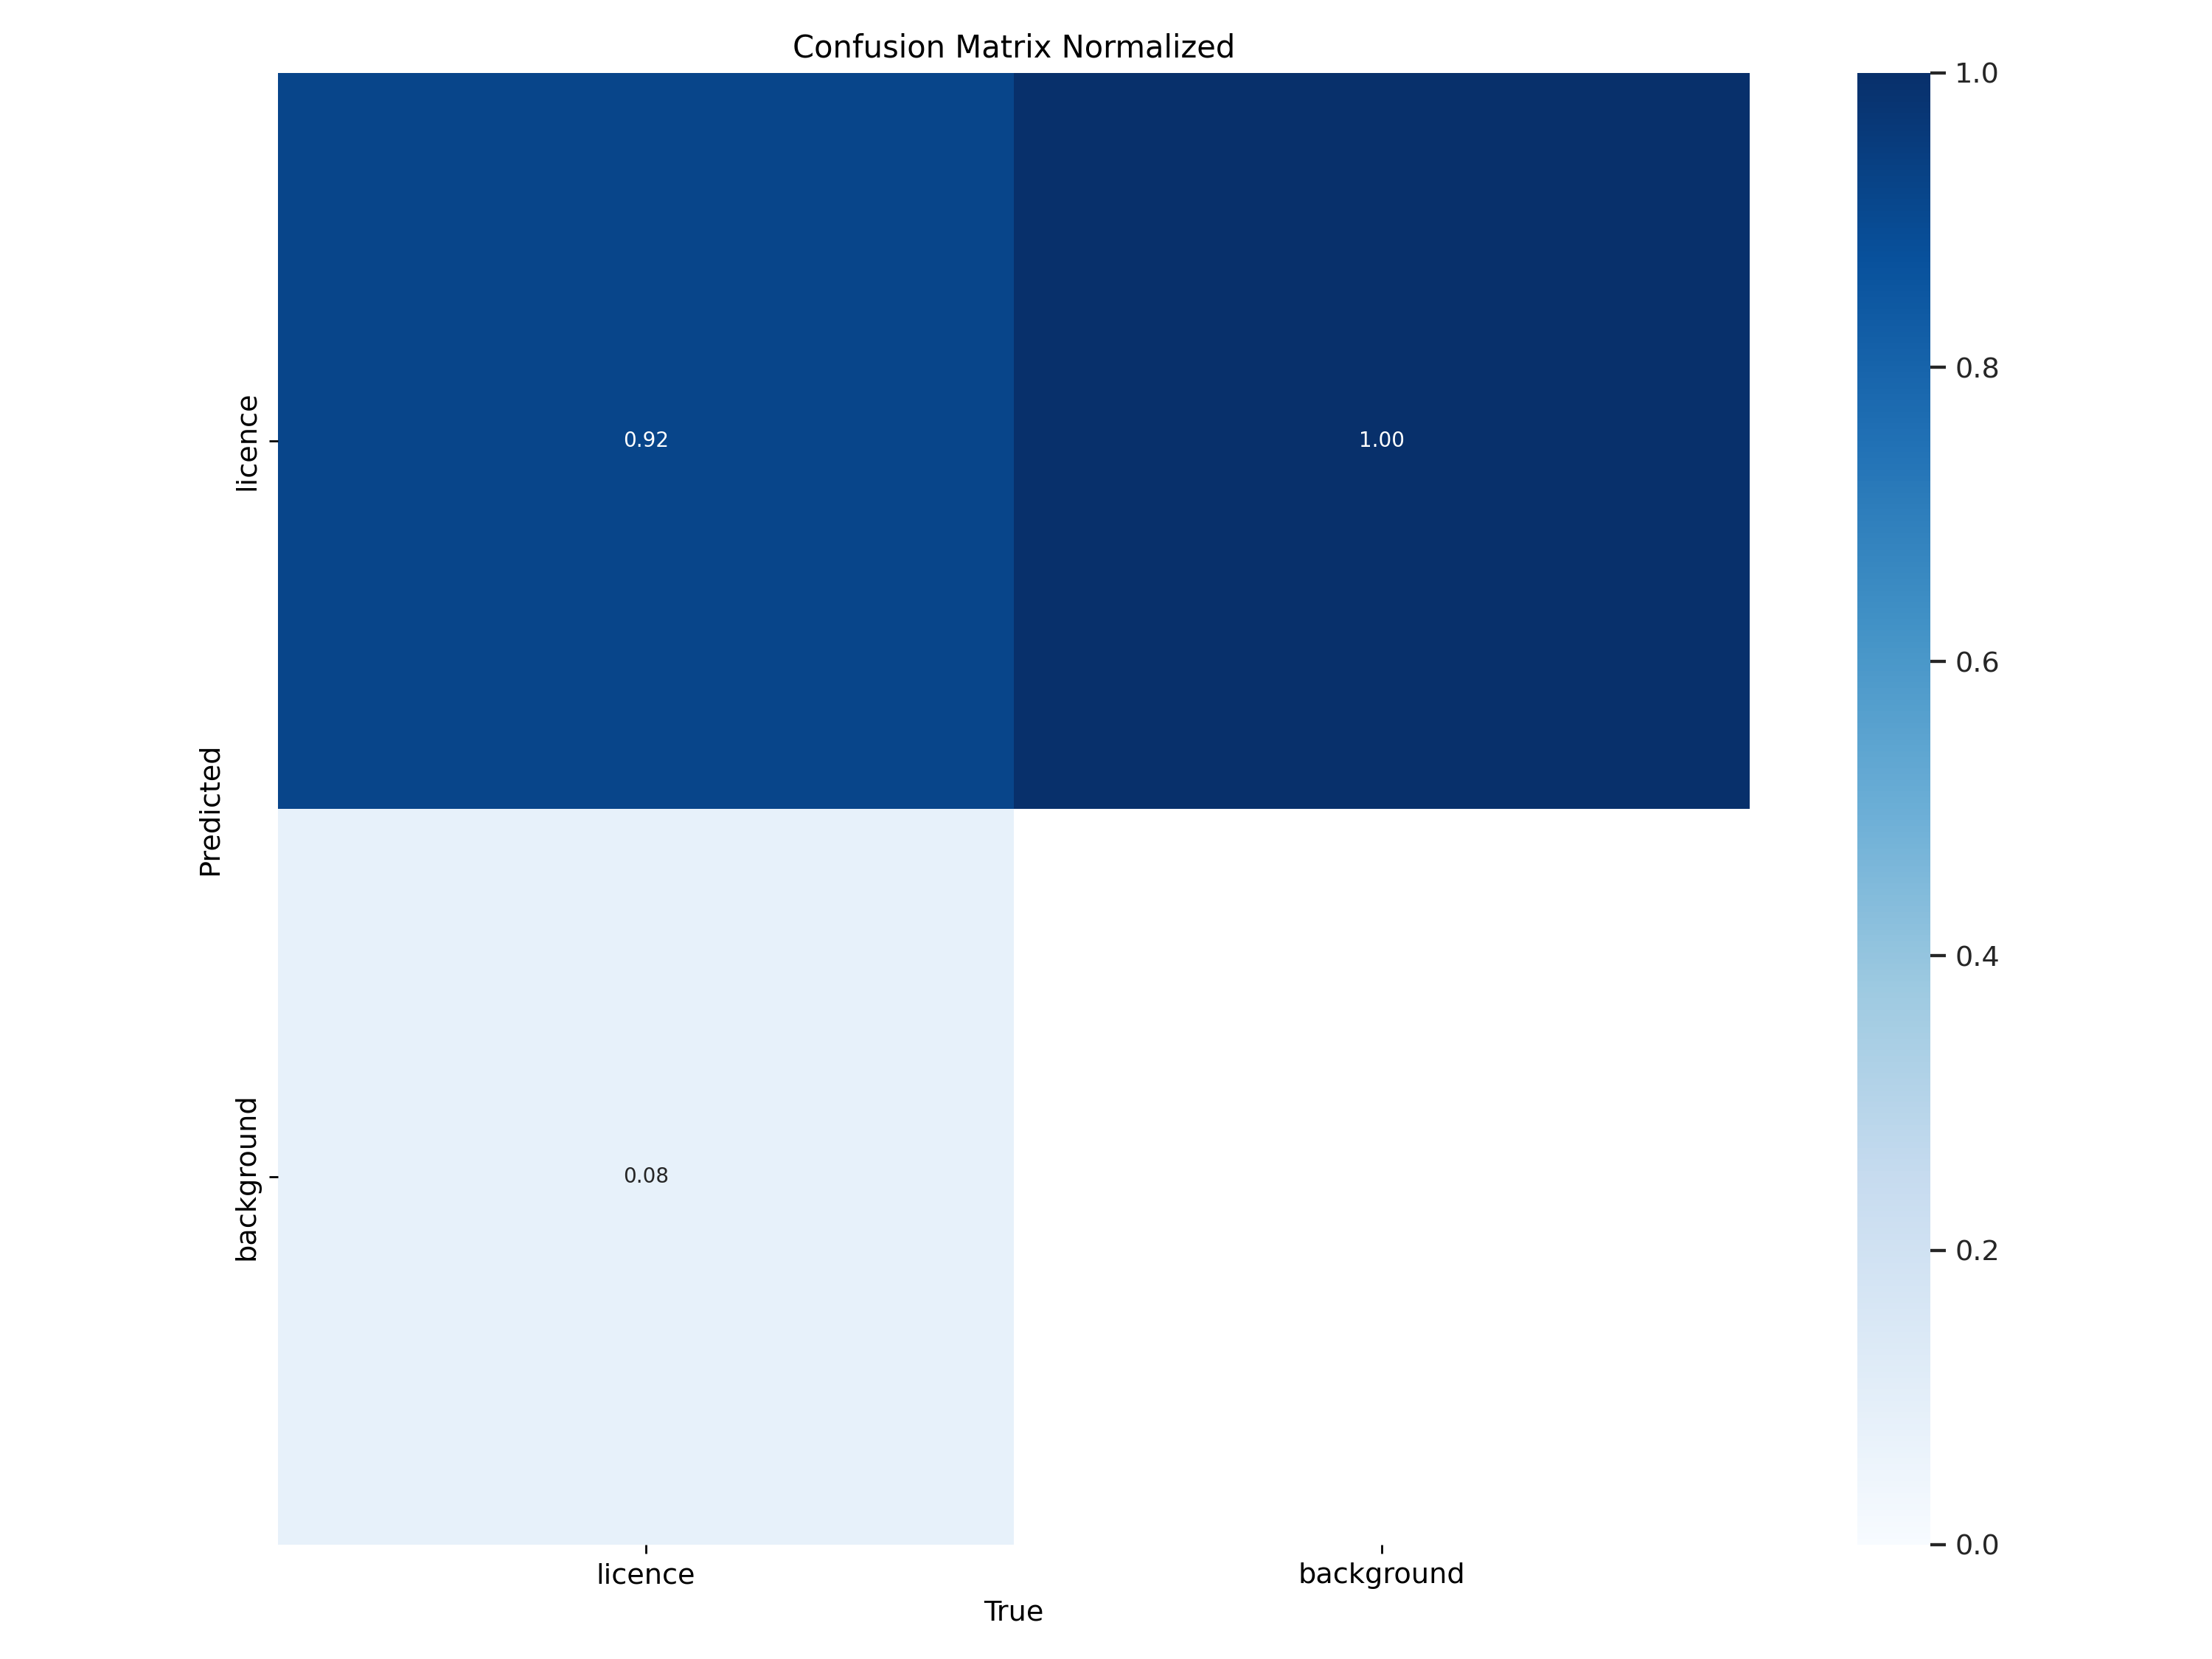

In [17]:
%matplotlib inline
from PIL import Image

# 挂载 Google Drive
drive.mount('/content/drive')

# 定义图片路径和目标路径
source_path = '/content/runs/detect/train2/confusion_matrix_normalized.png'
destination_path = '/content/drive/MyDrive/confusion_matrix_normalized1.png'

# 将图片复制到 Google Drive
shutil.copy(source_path, destination_path)

# 列出文件路径
path = '/content/runs/detect/train/'
files = os.listdir(path)
print("文件列表:", files)

Image.open('/content/runs/detect/train2/confusion_matrix_normalized.png')

In [ ]:
# 从根目录或 Google Drive 中查找
search_dir = "/content/"  # 或者 "/content/drive/MyDrive/"，视情况而定

# 遍历目录及其子目录查找文件
for root, dirs, files in os.walk(search_dir):
    if "best.pt" in files:
        print("Found best.pt at:", os.path.join(root, "best.pt"))
        break

Found best.pt at: /content/drive/MyDrive/License_Plate/Final_data/best.pt


In [18]:
import glob
import shutil

# 查找最新生成的模型文件
model_path = glob.glob('/content/runs/detect/*/weights/best.pt')  # 查找所有的 best.pt 文件
if model_path:
    latest_model_path = model_path[-1]  # 获取最新的模型文件
    destination_path = '/content/drive/MyDrive/License_Plate/Final_data/best1.pt'  # 目标保存路径

    # 将模型文件复制到目标路径
    shutil.copy(latest_model_path, destination_path)
    print("模型已成功保存到 Final_data 文件夹下。")
else:
    print("未找到训练好的模型文件。")


模型已成功保存到 Final_data 文件夹下。



0: 448x640 1 licence, 64.8ms
Speed: 2.5ms preprocess, 64.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


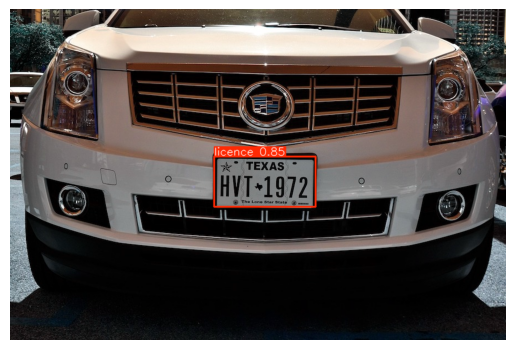

In [19]:
import requests
from io import BytesIO
from PIL import Image

# 加载自定义模型
model = YOLO('/content/drive/MyDrive/License_Plate/Final_data/best1.pt')  # 加载训练好的 YOLO 模型

# 下载图片
url = "https://www.serviceasap.com/media/zoo/images/ASAPTX_MayBlog5_LicensePlateRecognition_CorpusChristiTX__92d4e770e7018f6104fa17119bf88630.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 使用模型进行预测，设置置信度和 IoU 阈值
results = model(img, conf=0.6, iou=0.7, save=True)

# 提取检测结果中的信息
boxes = results[0].boxes  # 获取检测到的边界框信息

# 筛选重复检测框
filtered_boxes = []
for box in boxes:
    box_data = box.xyxy[0].tolist()  # 边界框坐标 (xmin, ymin, xmax, ymax)
    score = box.conf  # 置信度
    if score > 0.6:  # 只保留高置信度的框
        filtered_boxes.append(box)

# 绘制筛选后的结果
result_img = results[0].plot(filtered_boxes)  # 绘制筛选后的框

# 使用 matplotlib 显示图像
plt.imshow(result_img)
plt.axis('off')  # 隐藏坐标轴
plt.show()

In [4]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,776 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [5]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 23.0 MB/s eta 0:00:00


In [6]:
!locale



LANG=en_US.UTF-8
LANGUAGE=en_US
LC_CTYPE="en_US.UTF-8"
LC_NUMERIC="en_US.UTF-8"
LC_TIME="en_US.UTF-8"
LC_COLLATE="en_US.UTF-8"
LC_MONETARY="en_US.UTF-8"
LC_MESSAGES="en_US.UTF-8"
LC_PAPER="en_US.UTF-8"
LC_NAME="en_US.UTF-8"
LC_ADDRESS="en_US.UTF-8"
LC_TELEPHONE="en_US.UTF-8"
LC_MEASUREMENT="en_US.UTF-8"
LC_IDENTIFICATION="en_US.UTF-8"
LC_ALL=en_US.UTF-8


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
0: 448x640 1 licence, 68.6ms
Speed: 22.7ms preprocess, 68.6ms inference, 769.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
Tesseract OCR 识别的车牌文字: ci 36
EasyOCR 识别的车牌文字: GVAB: 561


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


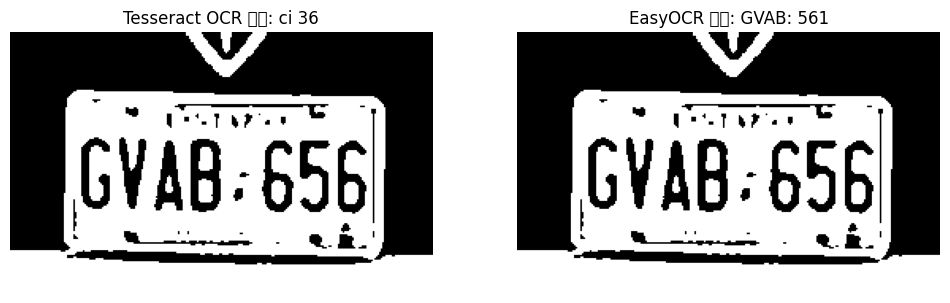

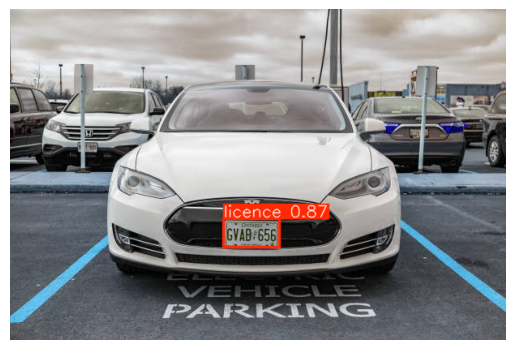

In [6]:
import pytesseract
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import requests
from io import BytesIO
from PIL import Image, ImageEnhance

# 初始化 EasyOCR 读取器
reader = easyocr.Reader(['en'], gpu=True)

# 加载自定义 YOLO 模型
model = YOLO('/content/drive/MyDrive/License_Plate/Final_data/best1.pt')  # 加载训练好的 YOLO 模型

# 下载测试图片
url = "https://media.istockphoto.com/id/1184210830/photo/tesla-model-s-front-view.jpg?s=612x612&w=0&k=20&c=DKhqnUSrBGsc5VaOKblC8_GIyEsTHsBaGFLS-aD5wQ4="
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 确保图像为 RGB 模式
if img.mode != 'RGB':
    img = img.convert('RGB')

# 使用 YOLO 模型进行预测
results = model(img, conf=0.6, iou=0.7, save=True)

# 提取检测结果中的边界框信息
boxes = results[0].boxes  # 获取检测到的边界框信息

# 筛选高置信度的检测框并进行处理
for idx, box in enumerate(boxes):
    box_data = box.xyxy[0].tolist()  # 边界框坐标 (xmin, ymin, xmax, ymax)
    score = box.conf  # 置信度
    if score > 0.6:  # 只保留高置信度的框
        # 提取边界框坐标并添加 padding
        padding = 10
        x1 = max(0, int(box_data[0]) - padding)
        y1 = max(0, int(box_data[1]) - padding)
        x2 = min(img.size[0], int(box_data[2]) + padding)
        y2 = min(img.size[1], int(box_data[3]) + padding)

        # 转换图像为 OpenCV 格式 (BGR)
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # 裁剪出车牌区域并放大分辨率
        plate = img_cv[y1:y2, x1:x2]
        plate_resized = cv2.resize(plate, (0, 0), fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

        # 转换为 PIL 图像以增强亮度和对比度
        plate_pil = Image.fromarray(cv2.cvtColor(plate_resized, cv2.COLOR_BGR2RGB))

        # 增强车牌区域亮度和对比度
        contrast_enhancer = ImageEnhance.Contrast(plate_pil)
        plate_pil = contrast_enhancer.enhance(2.0)  # 调整对比度
        brightness_enhancer = ImageEnhance.Brightness(plate_pil)
        plate_pil = brightness_enhancer.enhance(1.5)  # 调整亮度

        # 转换为灰度图像并进行二值化
        plate_gray = cv2.cvtColor(np.array(plate_pil), cv2.COLOR_RGB2GRAY)
        _, plate_binary = cv2.threshold(plate_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 使用 Tesseract OCR 识别二值化图像中的文本
        tesseract_text = pytesseract.image_to_string(plate_binary, config='--psm 7 --oem 3')  # 单行模式

        # 使用 EasyOCR 识别二值化图像中的文本
        easyocr_text = reader.readtext(plate_binary, detail=0)

        # 输出识别结果
        print(f"Tesseract OCR 识别的车牌文字: {tesseract_text.strip()}")
        print(f"EasyOCR 识别的车牌文字: {''.join(easyocr_text)}")

        # 显示 Tesseract OCR 增强图像
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(plate_binary, cmap='gray')
        plt.title(f"Tesseract OCR 结果: {tesseract_text.strip()}")
        plt.axis('off')

        # 显示 EasyOCR 增强图像
        plt.subplot(1, 2, 2)
        plt.imshow(plate_binary, cmap='gray')
        plt.title(f"EasyOCR 结果: {''.join(easyocr_text)}")
        plt.axis('off')

        plt.show()

# 绘制检测结果
result_img = results[0].plot()  # 绘制检测框

# 使用 matplotlib 显示结果图像
plt.imshow(result_img)
plt.axis('off')  # 隐藏坐标轴
plt.show()
